In [1]:
#Healthcare Appointment No-Show Analysis

In [2]:
# Problem: Patients who miss appointments may experience delays diagnosis and treatment, which can lead to worsening health conditions.

In [3]:
#Importing Packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Healthcare Appointment No Show- Kaggle 
import kagglehub
path = kagglehub.dataset_download("samuelotiattakorah/healthcare-no-show-appointment-data")
print("Path to dataset files:", path)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
       print(os.path.join(dirname, filename))


Path to dataset files: /kaggle/input/healthcare-no-show-appointment-data
/kaggle/input/healthcare-no-show-appointment-data/healthcare_noshows_appointments.csv


In [4]:
#Loading dataset
dataset=pd.read_csv('/kaggle/input/healthcare-no-show-appointment-data/healthcare_noshows_appointments.csv')
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [5]:
# Checking for missing values
dataset.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

In [6]:
#Summary Statistics
dataset.describe()

#Check column names and data types
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


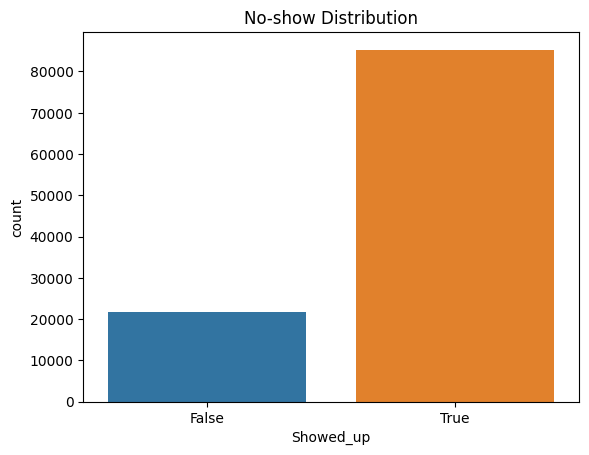

In [7]:
# Visualization of No-shows
sns.countplot(data=dataset, x='Showed_up')
plt.title('No-show Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


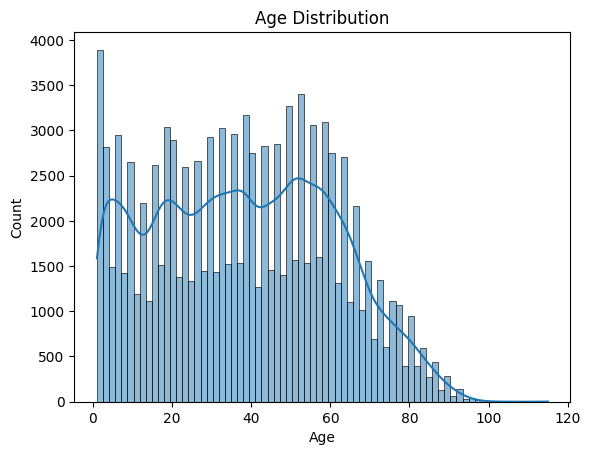

In [8]:
# Visualize the age distribution
sns.histplot(dataset['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

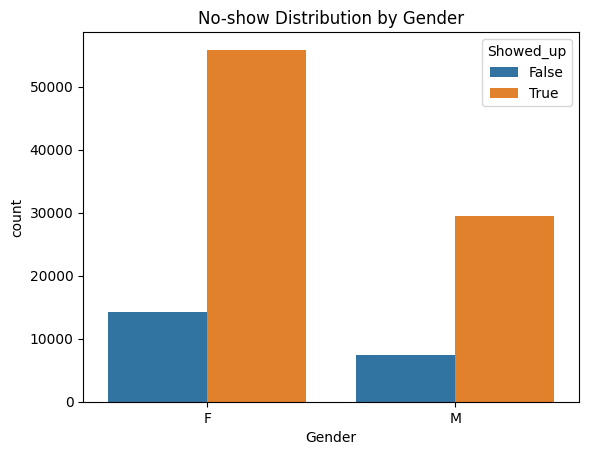

In [9]:
#Visualizing the gender vs no-show
sns.countplot(data=dataset, x='Gender', hue='Showed_up')
plt.title ('No-show Distribution by Gender')
plt.show()

In [10]:
# Appointment Scheduling and No-shows

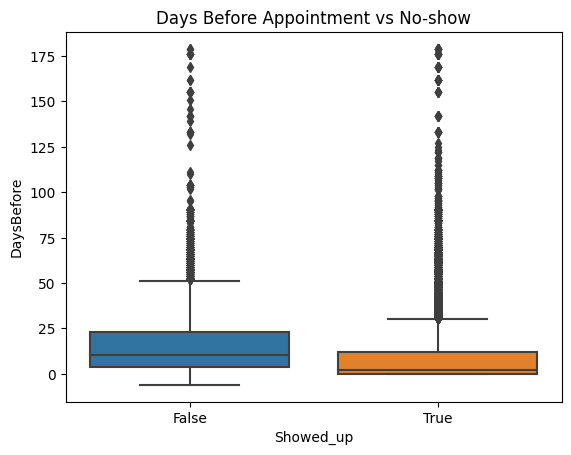

In [11]:
#Convert columns to datetime format
dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay'])
dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay'])

#Calculate the number of days before the appointment
dataset['DaysBefore'] =(dataset['AppointmentDay'] - dataset['ScheduledDay']).dt.days

#Visualize the days before the appointment vs No-show
sns.boxplot(data=dataset, x= 'Showed_up', y='DaysBefore')
plt.title('Days Before Appointment vs No-show')
plt.show()

In [12]:
dataset.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff', 'DaysBefore'],
      dtype='object')

In [13]:
# Renaming Hipertension to Hypertension
dataset.rename(columns={'Hipertension': 'Hypertension'}, inplace = True)
dataset.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff', 'DaysBefore'],
      dtype='object')

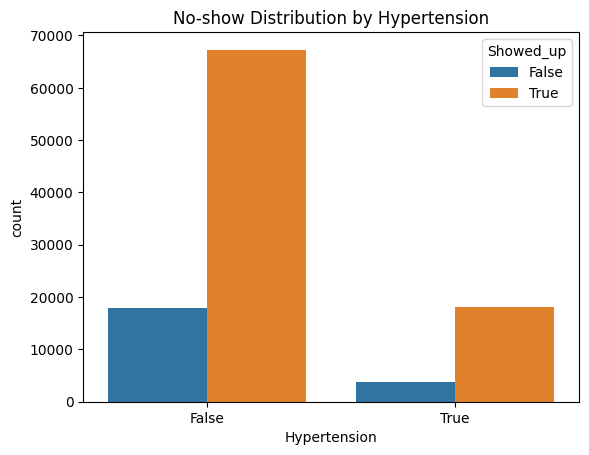

In [14]:
#Visualizating the relationship between Hypertension and No-shows
sns.countplot(x='Hypertension', hue='Showed_up', data=dataset)
plt.title('No-show Distribution by Hypertension')
plt.show()

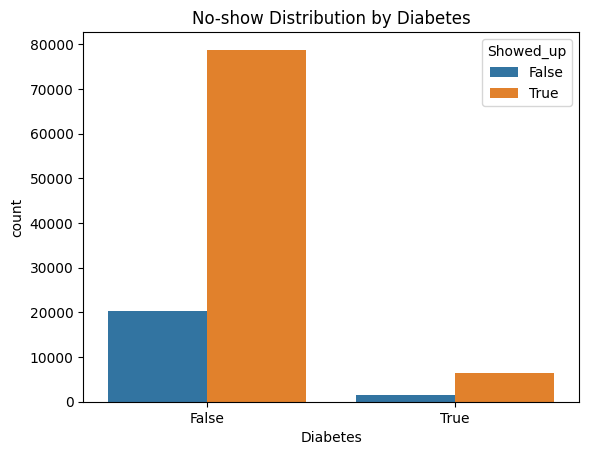

In [15]:
#Visualizing the relationship between Diabetes and No-show
sns.countplot(x='Diabetes', hue='Showed_up', data=dataset)
plt.title('No-show Distribution by Diabetes')
plt.show()

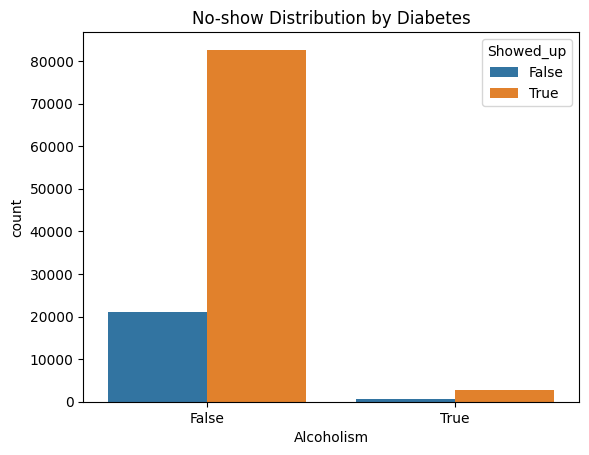

In [16]:
#Visualizing the relationship between Alcoholism and No-show
sns.countplot(x='Alcoholism', hue='Showed_up', data=dataset)
plt.title('No-show Distribution by Diabetes')
plt.show()

In [17]:
# Group by hypertension and calculate the no-show rate 
hypertension_no_show = dataset.groupby('Hypertension')['Showed_up'].mean()

# Group by diabetes and calculate the no-show rate 
diabetes_no_show = dataset.groupby('Diabetes')['Showed_up'].mean()

#Group by alcoholism and calculate the no-show
alcoholism_no_show = dataset.groupby('Alcoholism')['Showed_up'].mean()

# Displaying the rates 
print ("No-show Rate for Hypertension")
print (hypertension_no_show)
print ("No-show Rate for Diabetes")
print (diabetes_no_show)
print ("No-show Rate for Alcoholism")
print (alcoholism_no_show)

No-show Rate for Hypertension
Hypertension
False    0.789778
True     0.826980
Name: Showed_up, dtype: float64
No-show Rate for Diabetes
Diabetes
False    0.795545
True     0.819967
Name: Showed_up, dtype: float64
No-show Rate for Alcoholism
Alcoholism
False    0.797321
True     0.798512
Name: Showed_up, dtype: float64


In [18]:
#Statiscal Test: Using the Chi-Squares Test to evaluate is there is a significant difference

In [19]:
from scipy.stats import chi2_contingency

# Contingency Table 
contingency_table_ht = pd.crosstab(dataset['Hypertension'], dataset['Showed_up'])

#Chi-Sqaure Test
chi2, p, dof, expected = chi2_contingency(contingency_table_ht)

#Output 
print (f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

#Interpretation of p-value
if p < 0.05:
    print("There is a siginificant relationship between hypertension  and no-show rates.")
else:
    print("There is no significanr relationship between hypertension and no-show rates.")
    
    

Chi-Square Statistic: 148.45985866324457
P-value: 3.7636497903885083e-34
There is a siginificant relationship between hypertension  and no-show rates.


In [20]:
from scipy.stats import chi2_contingency

# Contingency Table 
contingency_table_db = pd.crosstab(dataset['Diabetes'], dataset['Showed_up'])

#Chi-Sqaure Test
chi2, p, dof, expected = chi2_contingency(contingency_table_db)

#Output 
print (f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

#Interpretation of p-value
if p < 0.05:
    print("There is a siginificant relationship between diabetes and no-show rates.")
else:
    print("There is no significanr relationship between diabetes and no-show rates.")
    

Chi-Square Statistic: 26.992012023422383
P-value: 2.0429799883773034e-07
There is a siginificant relationship between diabetes and no-show rates.
